This guide comes directly from the [10 Minute Guide to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) on the Pandas official website. I ported it into this kernel to make the code more accessible. This guide is geared towards beginners who haven't used Pandas before. It has great examples on how powerful Pandas can be. Enjoy!

### This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation
See the [Data Structure Intro section](Data Structure Intro section). Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) by passing a numpy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20141101', periods=6)
dates

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), columns=['one','two','three','four'], index=dates)
df

,one,two,three,four
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961
2014-11-02,2.418214,1.134130,0.567361,0.921225
2014-11-03,0.891612,1.293983,-0.836017,-1.487740
2014-11-04,1.107417,-0.111957,0.618144,-0.382438
2014-11-05,-0.272585,-0.948973,0.122929,-0.909909
2014-11-06,0.064267,1.262345,0.961092,1.683544


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
   ....: 
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes):

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


# Viewing Data
See the [Basics section](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics)
See the top & bottom rows of the frame

In [7]:
df.head()

,one,two,three,four
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961
2014-11-02,2.418214,1.134130,0.567361,0.921225
2014-11-03,0.891612,1.293983,-0.836017,-1.487740
2014-11-04,1.107417,-0.111957,0.618144,-0.382438
2014-11-05,-0.272585,-0.948973,0.122929,-0.909909


In [8]:
df.tail(3)

,one,two,three,four
2014-11-04,1.107417,-0.111957,0.618144,-0.382438
2014-11-05,-0.272585,-0.948973,0.122929,-0.909909
2014-11-06,0.064267,1.262345,0.961092,1.683544


In [9]:
df.sample(5)

,one,two,three,four
2014-11-06,0.064267,1.262345,0.961092,1.683544
2014-11-03,0.891612,1.293983,-0.836017,-1.487740
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961
2014-11-04,1.107417,-0.111957,0.618144,-0.382438
2014-11-02,2.418214,1.134130,0.567361,0.921225


Display the index, columns, and the underlying numpy data

In [10]:
df.index

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['one', 'two', 'three', 'four'], dtype='object')

In [12]:
df.values.shape

(6, 4)

Describe shows a quick statistic summary of your data

In [13]:
df.describe()

,one,two,three,four
count,6.000000,6.000000,6.000000,6.000000
mean,0.518339,0.241977,0.390621,-0.219880
std,1.228255,1.140423,0.671524,1.256113
min,-1.098893,-1.177668,-0.836017,-1.487740
25%,-0.188372,-0.739719,0.234037,-1.085448
50%,0.477939,0.511087,0.592752,-0.646173
75%,1.053466,1.230291,0.837200,0.595309
max,2.418214,1.293983,0.961092,1.683544


Transposing your data

In [14]:
df.T

,2014-11-01 00:00:00,2014-11-02 00:00:00,2014-11-03 00:00:00,2014-11-04 00:00:00,2014-11-05 00:00:00,2014-11-06 00:00:00
one,-1.098893,2.418214,0.891612,1.107417,-0.272585,0.064267
two,-1.177668,1.134130,1.293983,-0.111957,-0.948973,1.262345
three,0.910219,0.567361,-0.836017,0.618144,0.122929,0.961092
four,-1.143961,0.921225,-1.487740,-0.382438,-0.909909,1.683544


Sorting by an axis (In this case, sorting the columns in reverse alphabetical order):

In [15]:
df.sort_index(axis=1, ascending=False)

,two,three,one,four
2014-11-01,-1.177668,0.910219,-1.098893,-1.143961
2014-11-02,1.134130,0.567361,2.418214,0.921225
2014-11-03,1.293983,-0.836017,0.891612,-1.487740
2014-11-04,-0.111957,0.618144,1.107417,-0.382438
2014-11-05,-0.948973,0.122929,-0.272585,-0.909909
2014-11-06,1.262345,0.961092,0.064267,1.683544


Sorting by values

In [16]:
df.sort_values(by='two')

,one,two,three,four
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961
2014-11-05,-0.272585,-0.948973,0.122929,-0.909909
2014-11-04,1.107417,-0.111957,0.618144,-0.382438
2014-11-02,2.418214,1.134130,0.567361,0.921225
2014-11-06,0.064267,1.262345,0.961092,1.683544
2014-11-03,0.891612,1.293983,-0.836017,-1.487740


# Selection

Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.
See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

## Getting

Selecting a single column, which yields a Series, equivalent to df.one

In [17]:
df.sample(3)

,one,two,three,four
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961
2014-11-05,-0.272585,-0.948973,0.122929,-0.909909
2014-11-06,0.064267,1.262345,0.961092,1.683544


In [18]:
type(df['one'])

pandas.core.series.Series

In [19]:
df['one']

2014-11-01   -1.098893
2014-11-02    2.418214
2014-11-03    0.891612
2014-11-04    1.107417
2014-11-05   -0.272585
2014-11-06    0.064267
Freq: D, Name: one, dtype: float64

In [20]:
df.one

2014-11-01   -1.098893
2014-11-02    2.418214
2014-11-03    0.891612
2014-11-04    1.107417
2014-11-05   -0.272585
2014-11-06    0.064267
Freq: D, Name: one, dtype: float64

Selecting via [], which slices the rows.

In [21]:
df[1:3]

,one,two,three,four
2014-11-02,2.418214,1.134130,0.567361,0.921225
2014-11-03,0.891612,1.293983,-0.836017,-1.487740


## Selecting by Label

See more in[ Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [22]:
df.loc['2014-11-02']

one      2.418214
two      1.134130
three    0.567361
four     0.921225
Name: 2014-11-02 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [23]:
df.loc[:,['one','two']]

,one,two
2014-11-01,-1.098893,-1.177668
2014-11-02,2.418214,1.134130
2014-11-03,0.891612,1.293983
2014-11-04,1.107417,-0.111957
2014-11-05,-0.272585,-0.948973
2014-11-06,0.064267,1.262345


Showing label slicing, both endpoints are included

In [24]:
df.loc['20141102':'20141104',['one','two']]

,one,two
2014-11-02,2.418214,1.134130
2014-11-03,0.891612,1.293983
2014-11-04,1.107417,-0.111957


For getting a scalar value

In [25]:
df.loc[dates[0],'one']

-1.0988929981088784

## Selection by Position

See more in [Selection by Position](Selection by Position)

Select via the position of the passed integers

In [26]:
df.iloc[3]

one      1.107417
two     -0.111957
three    0.618144
four    -0.382438
Name: 2014-11-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

By lists of integer position locations, similar to the numpy/python style

In [27]:
df.iloc[[1,2,4],[0,2]]

,one,three
2014-11-02,2.418214,0.567361
2014-11-03,0.891612,-0.836017
2014-11-05,-0.272585,0.122929


## Boolean Indexing
Using a single column’s values to select data.

In [28]:
df

,one,two,three,four
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961
2014-11-02,2.418214,1.134130,0.567361,0.921225
2014-11-03,0.891612,1.293983,-0.836017,-1.487740
2014-11-04,1.107417,-0.111957,0.618144,-0.382438
2014-11-05,-0.272585,-0.948973,0.122929,-0.909909
2014-11-06,0.064267,1.262345,0.961092,1.683544


In [29]:
df[df.one>0]

,one,two,three,four
2014-11-02,2.418214,1.134130,0.567361,0.921225
2014-11-03,0.891612,1.293983,-0.836017,-1.487740
2014-11-04,1.107417,-0.111957,0.618144,-0.382438
2014-11-06,0.064267,1.262345,0.961092,1.683544


In [30]:
df[df.two > df.one]

,one,two,three,four
2014-11-03,0.891612,1.293983,-0.836017,-1.487740
2014-11-06,0.064267,1.262345,0.961092,1.683544


Using the isin method for filtering:

In [31]:
df2 = df.copy()
df2['five'] = ['one', 'one','two','three','four','three']
df2

,one,two,three,four,five
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961,one
2014-11-02,2.418214,1.134130,0.567361,0.921225,one
2014-11-03,0.891612,1.293983,-0.836017,-1.487740,two
2014-11-04,1.107417,-0.111957,0.618144,-0.382438,three
2014-11-05,-0.272585,-0.948973,0.122929,-0.909909,four
2014-11-06,0.064267,1.262345,0.961092,1.683544,three


In [32]:
df2[(df2['five']=='one') | (df2['five']=='four')]

,one,two,three,four,five
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961,one
2014-11-02,2.418214,1.134130,0.567361,0.921225,one
2014-11-05,-0.272585,-0.948973,0.122929,-0.909909,four


In [33]:
df2[df2['five'].isin(['one','four','three'])]

,one,two,three,four,five
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961,one
2014-11-02,2.418214,1.134130,0.567361,0.921225,one
2014-11-04,1.107417,-0.111957,0.618144,-0.382438,three
2014-11-05,-0.272585,-0.948973,0.122929,-0.909909,four
2014-11-06,0.064267,1.262345,0.961092,1.683544,three


## Setting
Setting a new column automatically aligns the data by the indexes

In [34]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20141101', periods=6))
s1

2014-11-01    1
2014-11-02    2
2014-11-03    3
2014-11-04    4
2014-11-05    5
2014-11-06    6
Freq: D, dtype: int64

In [35]:
df['six'] = s1
df

,one,two,three,four,six
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961,1
2014-11-02,2.418214,1.134130,0.567361,0.921225,2
2014-11-03,0.891612,1.293983,-0.836017,-1.487740,3
2014-11-04,1.107417,-0.111957,0.618144,-0.382438,4
2014-11-05,-0.272585,-0.948973,0.122929,-0.909909,5
2014-11-06,0.064267,1.262345,0.961092,1.683544,6


## Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [36]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,one,two,three,four,six,E
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961,1,1.0
2014-11-02,2.418214,1.134130,0.567361,0.921225,2,1.0
2014-11-03,0.891612,1.293983,-0.836017,-1.487740,3,NaN
2014-11-04,1.107417,-0.111957,0.618144,-0.382438,4,NaN


To drop any rows that have missing data:

In [37]:
df1.dropna(how='any')

,one,two,three,four,six,E
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961,1,1.0
2014-11-02,2.418214,1.134130,0.567361,0.921225,2,1.0


Filling missing data:

In [38]:
df1

,one,two,three,four,six,E
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961,1,1.0
2014-11-02,2.418214,1.134130,0.567361,0.921225,2,1.0
2014-11-03,0.891612,1.293983,-0.836017,-1.487740,3,NaN
2014-11-04,1.107417,-0.111957,0.618144,-0.382438,4,NaN


In [39]:
df1.fillna(value=5)

,one,two,three,four,six,E
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961,1,1.0
2014-11-02,2.418214,1.134130,0.567361,0.921225,2,1.0
2014-11-03,0.891612,1.293983,-0.836017,-1.487740,3,5.0
2014-11-04,1.107417,-0.111957,0.618144,-0.382438,4,5.0


In [40]:
df1['E'] = df1['E'].fillna(4)

In [41]:
df1['E'] = 3

## Operations
See the [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats
Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [42]:
df.mean()

one      0.518339
two      0.241977
three    0.390621
four    -0.219880
six      3.500000
dtype: float64

Same operation on the other axis:

In [43]:
df.mean(1)

2014-11-01   -0.302060
2014-11-02    1.408186
2014-11-03    0.572368
2014-11-04    1.046233
2014-11-05    0.598292
2014-11-06    1.994250
Freq: D, dtype: float64

### Apply
Applying functions to the data

In [44]:
df.apply(np.cumsum)

,one,two,three,four,six
2014-11-01,-1.098893,-1.177668,0.910219,-1.143961,1
2014-11-02,1.319321,-0.043538,1.477580,-0.222736,3
2014-11-03,2.210932,1.250445,0.641563,-1.710475,6
2014-11-04,3.318349,1.138489,1.259707,-2.092913,10
2014-11-05,3.045764,0.189515,1.382636,-3.002822,15
2014-11-06,3.110031,1.451861,2.343727,-1.319278,21


### Histogramming 
See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [45]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    6
2    4
3    3
4    4
5    2
6    6
7    6
8    3
9    1
dtype: int32

In [46]:
s.value_counts()

6    3
4    2
3    2
2    1
1    1
0    1
dtype: int64

In [47]:
s.value_counts(normalize=True)

6    0.3
4    0.2
3    0.2
2    0.1
1    0.1
0    0.1
dtype: float64

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [48]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [49]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [50]:
s.value_counts()

cat     1
C       1
B       1
Aaba    1
Baca    1
CABA    1
dog     1
A       1
dtype: int64

# Grouping
By “group by” we are referring to a process involving one or more of the following steps

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure

See the [Grouping section](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [51]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                           'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                           'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.602492,0.988319
1,bar,one,-1.227622,-0.207286
2,foo,two,0.545164,-0.138812
3,bar,three,1.075216,1.134954
4,foo,two,0.355055,-0.565343
5,bar,two,-0.337639,-0.944235
6,foo,one,0.093556,-0.704770
7,foo,three,-0.756973,0.662042


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [52]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.227622 -0.207286
    three  1.075216  1.134954
    two   -0.337639 -0.944235
foo one   -0.508936  0.283548
    three -0.756973  0.662042
    two    0.900219 -0.704155

# Plotting
[Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs

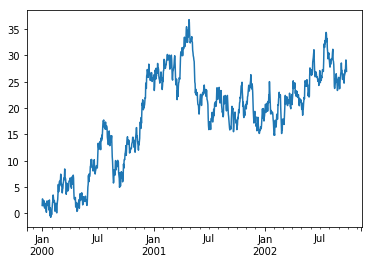

In [53]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

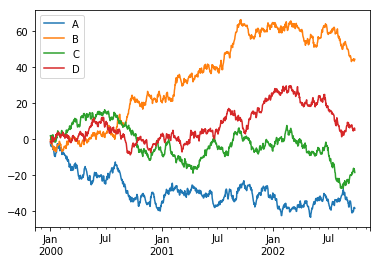

In [54]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting Data In/Out
### CSV
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv).

In [55]:
df

,A,B,C,D
2000-01-01,-2.048623,-0.223668,1.959406,-1.313593
2000-01-02,-3.372663,-2.317316,1.211092,-0.963307
2000-01-03,-3.823716,-1.117382,-0.151371,-1.175526
2000-01-04,-2.022191,-1.700453,0.672747,-1.459087
2000-01-05,-2.552789,-1.949926,1.073234,-2.263618
2000-01-06,-3.073303,-2.512801,1.866388,-0.679164
2000-01-07,-4.326215,-3.561859,2.298682,1.611832
2000-01-08,-3.397108,-3.656333,1.591028,0.418104
2000-01-09,-5.507013,-4.113969,2.220965,0.950688
2000-01-10,-4.333515,-5.212221,2.369454,-0.225886


In [56]:
df.to_csv('foo.csv')

In [57]:
pd.read_csv('foo.csv', index_col=0)

,A,B,C,D
2000-01-01,-2.048623,-0.223668,1.959406,-1.313593
2000-01-02,-3.372663,-2.317316,1.211092,-0.963307
2000-01-03,-3.823716,-1.117382,-0.151371,-1.175526
2000-01-04,-2.022191,-1.700453,0.672747,-1.459087
2000-01-05,-2.552789,-1.949926,1.073234,-2.263618
2000-01-06,-3.073303,-2.512801,1.866388,-0.679164
2000-01-07,-4.326215,-3.561859,2.298682,1.611832
2000-01-08,-3.397108,-3.656333,1.591028,0.418104
2000-01-09,-5.507013,-4.113969,2.220965,0.950688
2000-01-10,-4.333515,-5.212221,2.369454,-0.225886


### Excel
Reading and writing to [MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel).

Writing to an excel file:

In [58]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file:

In [59]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-2.048623,-0.223668,1.959406,-1.313593
2000-01-02,-3.372663,-2.317316,1.211092,-0.963307
2000-01-03,-3.823716,-1.117382,-0.151371,-1.175526
2000-01-04,-2.022191,-1.700453,0.672747,-1.459087
2000-01-05,-2.552789,-1.949926,1.073234,-2.263618
2000-01-06,-3.073303,-2.512801,1.866388,-0.679164
2000-01-07,-4.326215,-3.561859,2.298682,1.611832
2000-01-08,-3.397108,-3.656333,1.591028,0.418104
2000-01-09,-5.507013,-4.113969,2.220965,0.950688
2000-01-10,-4.333515,-5.212221,2.369454,-0.225886


# Titanic

In [60]:
df = pd.read_csv('titanic.csv')

In [61]:
df.shape

(891, 11)

In [62]:
df.groupby('Sex').Survived.mean().sort_values(ascending=False)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [63]:
df.groupby(df.Age<18).Survived.mean()

Age
False    0.359638
True     0.542373
Name: Survived, dtype: float64